In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"seodabin","key":"ae998968abc88e4f53084f99b6e17853"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

dataco-smart-supply-chain-for-big-data-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip dataco-smart-supply-chain-for-big-data-analysis.zip

Archive:  dataco-smart-supply-chain-for-big-data-analysis.zip
replace DataCoSupplyChainDataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: DataCoSupplyChainDataset.csv  
replace DescriptionDataCoSupplyChain.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: DescriptionDataCoSupplyChain.csv  
replace tokenized_access_logs.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tokenized_access_logs.csv  


In [ ]:
pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import r2_score, mean_absolute_error,roc_auc_score
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from category_encoders import TargetEncoder
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data=pd.read_csv('/content/DataCoSupplyChainDataset.csv',header= 0,encoding= 'unicode_escape')
print(data.shape)
data.head()

(180519, 53)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
desc=pd.read_csv('/content/DescriptionDataCoSupplyChain.csv',header= 0,encoding= 'unicode_escape')
desc

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,: Delivery status of orders: Advance shipping...
6,Late_delivery_risk,: Categorical variable that indicates if send...
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


In [ ]:
desc=desc.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)','Order Profit Per Order',
            'Sales per customer','Sales','Order Item Cardprod Id','Order Item Product Price','Category Id',
            'Department Id','Department Name','Customer Segment','Customer Zipcode','Customer City','Order State'])

KeyError: ignored

In [ ]:
df = data.copy(deep=False)

In [ ]:
print(df.shape)
print(df.columns)

(180519, 53)
Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
     

In [ ]:
df['Customer Full Name'] = df['Customer Fname']+df['Customer Lname']

In [ ]:
#결측치 제거 및 불필요 column제거(중복되는 내용들이 많음)
df=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)','Order Profit Per Order',
            'Sales per customer','Sales','Order Item Cardprod Id','Order Item Product Price','Category Id',
            'Department Id','Department Name','Customer Segment','Customer Zipcode','Customer City','Order State'],axis=1)

In [ ]:
print(df.shape)
print(df.columns)

(180519, 30)
Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Delivery Status', 'Late_delivery_risk',
       'Category Name', 'Customer Country', 'Customer Id', 'Customer State',
       'Market', 'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Order Item Total', 'Order Region',
       'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')


In [ ]:
df.apply(lambda x: sum(x.isnull()))

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Delivery Status                  0
Late_delivery_risk               0
Category Name                    0
Customer Country                 0
Customer Id                      0
Customer State                   0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Profit Ratio          0
Order Item Quantity              0
Order Item Total                 0
Order Region                     0
Order Status                     0
Product Card Id                  0
Product Category Id              0
Product Name                     0
Product Price                    0
Shipping Mode       

In [ ]:
#불필요 컬럼제거로 결측치항 다수 제거
#고객이름 결측치는 'NoName'으로 대체
df['Customer Full Name']=df['Customer Full Name'].fillna('NoName')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Delivery Status                180519 non-null  object 
 5   Late_delivery_risk             180519 non-null  int64  
 6   Category Name                  180519 non-null  object 
 7   Customer Country               180519 non-null  object 
 8   Customer Id                    180519 non-null  int64  
 9   Customer State                 180519 non-null  object 
 10  Market                         180519 non-null  object 
 11  Order City                     180519 non-null  object 
 12  Order Country                 

In [ ]:
df['order_year']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_week_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour
df['order_month_year'] = pd.to_datetime(df['order date (DateOrders)']).dt.to_period('M')

Text(0.5, 1.0, 'Product Total Sales & Year')

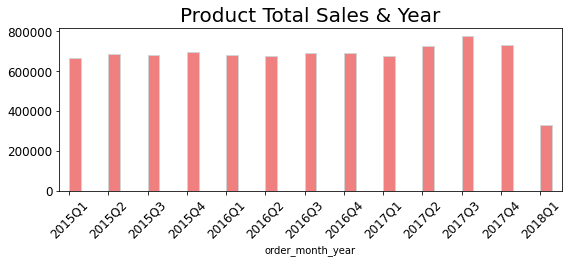

In [ ]:
quater= df.groupby('order_month_year')
plt.figure()
quartersales=quater['Product Price'].sum().resample('Q').mean().plot.bar(color='lightcoral',figsize=(9,3),fontsize=12,align='edge', edgecolor='lightgray',
        linewidth=1,width=0.3)
plt.xticks(rotation=45)
plt.title("Product Total Sales & Year",fontsize=20)




In [ ]:
#범주형 cloumn 값 확인
df.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
Customer Country,180519,2,EE. UU.,111146
Type,180519,4,DEBIT,69295
Delivery Status,180519,4,Late delivery,98977
Shipping Mode,180519,4,Standard Class,107752
Market,180519,5,LATAM,51594
Order Status,180519,9,COMPLETE,59491
Order Region,180519,23,Central America,28341
order_month_year,180519,37,2016-10,5398
Customer State,180519,46,PR,69373
Category Name,180519,50,Cleats,24551


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

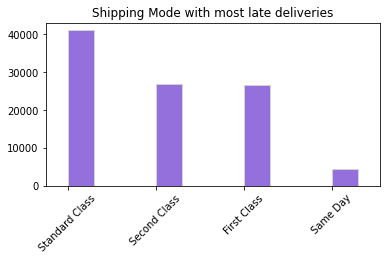

In [ ]:
late_delivery = df[(df['Delivery Status'] == 'Late delivery')]
late_delivery['Shipping Mode'].value_counts().plot.bar(color='mediumpurple',figsize=(6,3),fontsize=10,align='edge', edgecolor='lightgray',
        linewidth=1,width=0.3, title="Shipping Mode with most late deliveries")
plt.xticks(rotation=45)

In [ ]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

In [ ]:
#분류모델로 진행 = > label encoding

df_copy = df.copy(deep=False)
df_copy = df_copy.drop(['order date (DateOrders)'], axis=1)

def Change_dftype(data):
    for column in data.columns:
        if data[column].dtype == type(object):
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
    return data

df_encoder = Change_dftype(df_copy)
df_encoder.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Customer Id,Customer State,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Region,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,1,3,4,91.250000,0,0,40,1,20755,36,3,331,70,20755,77202,13.110000,0.04,180517,0.29,1,314.640015,15,2,1360,73,78,327.75,3,1875,2018,1,2,22,2018-01
1,3,5,4,-249.089996,1,1,40,1,19492,36,3,391,69,19492,75939,16.389999,0.05,179254,-0.80,1,311.359985,13,5,1360,73,78,327.75,3,5374,2018,1,5,12,2018-01
2,0,4,4,-247.779999,3,0,40,0,19491,5,3,391,69,19491,75938,18.030001,0.06,179253,-0.80,1,309.720001,13,1,1360,73,78,327.75,3,4426,2018,1,5,12,2018-01
3,1,3,4,22.860001,0,0,40,0,19490,5,3,3226,8,19490,75937,22.940001,0.07,179252,0.08,1,304.809998,11,2,1360,73,78,327.75,3,12923,2018,1,5,11,2018-01
4,2,2,4,134.210007,0,0,40,1,19489,36,3,3226,8,19489,75936,29.500000,0.09,179251,0.45,1,298.250000,11,6,1360,73,78,327.75,3,10633,2018,1,5,11,2018-01


In [ ]:
df_corr = df_encoder.corr()

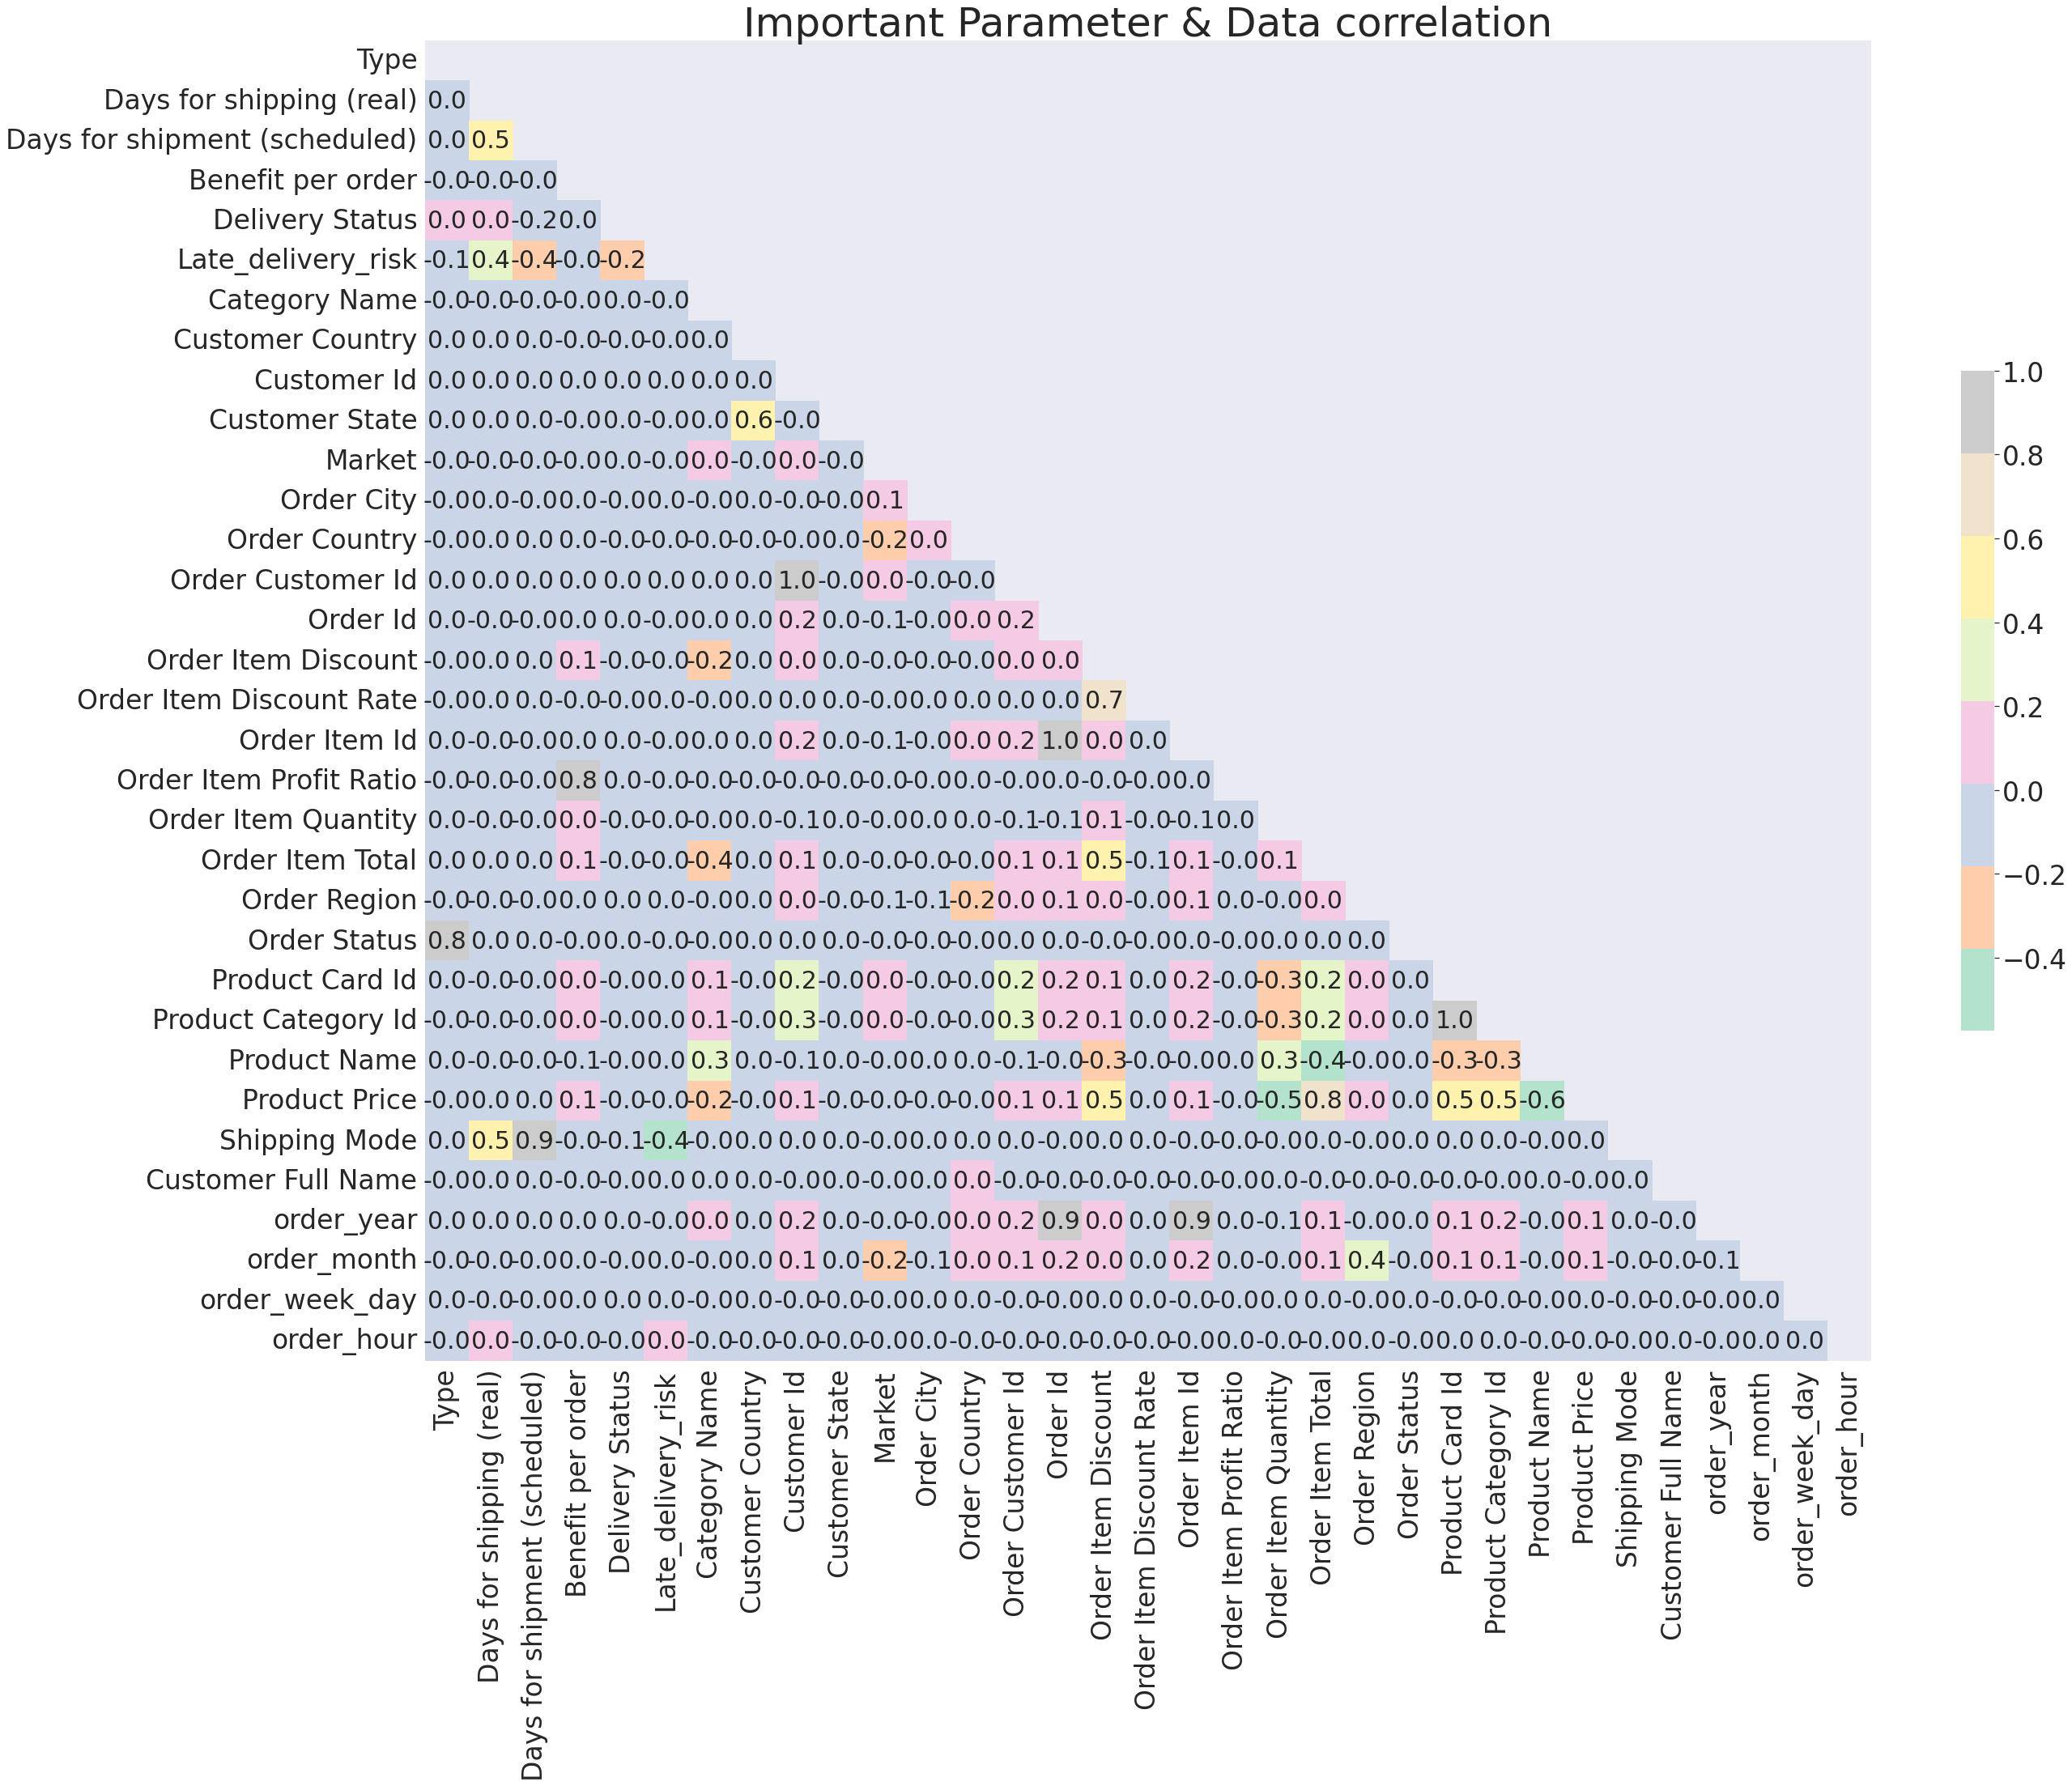

In [ ]:
# target선정을 위한 상관관계 파악
# 보기가 힘듦. 컬럼을 유형별로 나눠서 파악해야함
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(rc={'figure.figsize':(40,30)})
sns.set(font_scale = 3) 
sns.heatmap(df_corr,annot=True,mask=mask,fmt='.1f',cmap='Pastel2',annot_kws={"size": 30},cbar_kws={"shrink": .5})
plt.title('Important Parameter & Data correlation',fontsize=50)
plt.show()

Total revenue lost with orders :  -3883547.345768667


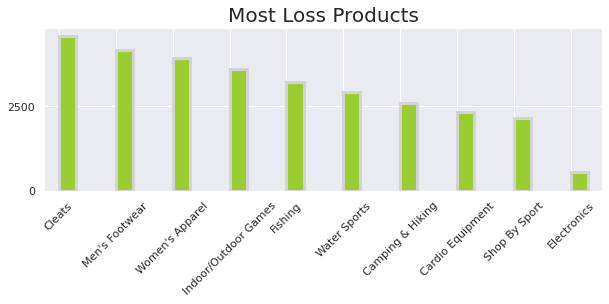

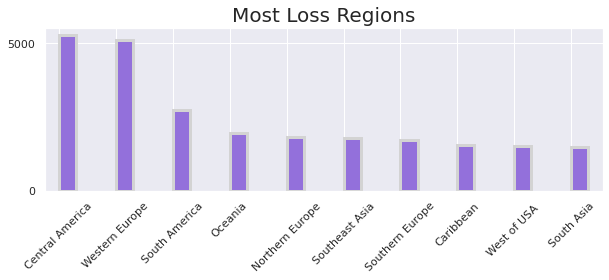

In [ ]:
#판매물건당 이익이 -인경우 확인, 왜 -가 뜨는걸까? 사기예상

loss = df[(df['Benefit per order']<0)]
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(color='yellowgreen',figsize=(10,3),fontsize=11,align='edge', edgecolor='lightgray',
        linewidth=3,width=0.3)
plt.xticks(rotation=45)
plt.title("Most Loss Products",fontsize=20)
plt.figure(2)
loss['Order Region'].value_counts().nlargest(10).plot.bar(color='mediumpurple',figsize=(10,3),fontsize=11,align='edge', edgecolor='lightgray',
        linewidth=3,width=0.3)
plt.xticks(rotation=45)
plt.title("Most Loss Regions",fontsize=20)
print('Total revenue lost with orders : ',loss['Benefit per order'].sum())

In [ ]:

high = df[(df['Order Status'] == 'SUSPECTED_FRAUD')]
fraud=high['Type'].value_counts()
fraud

TRANSFER    4062
Name: Type, dtype: int64

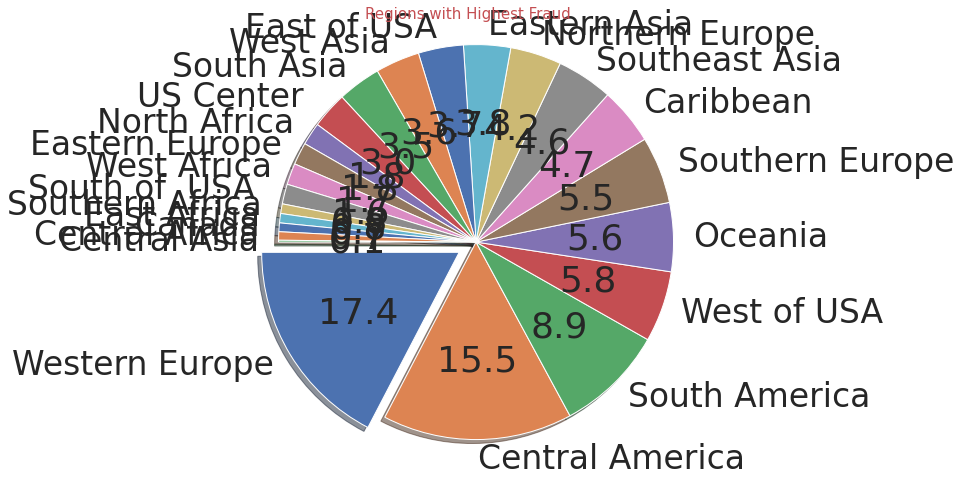

In [ ]:
high_fraud = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')]

fraud=high['Order Region'].value_counts().plot.pie(figsize=(13,8),
                                                  startangle=180, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),autopct='%.1f',shadow=True,)
plt.title("Regions with Highest Fraud",size=15,color='r') 
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

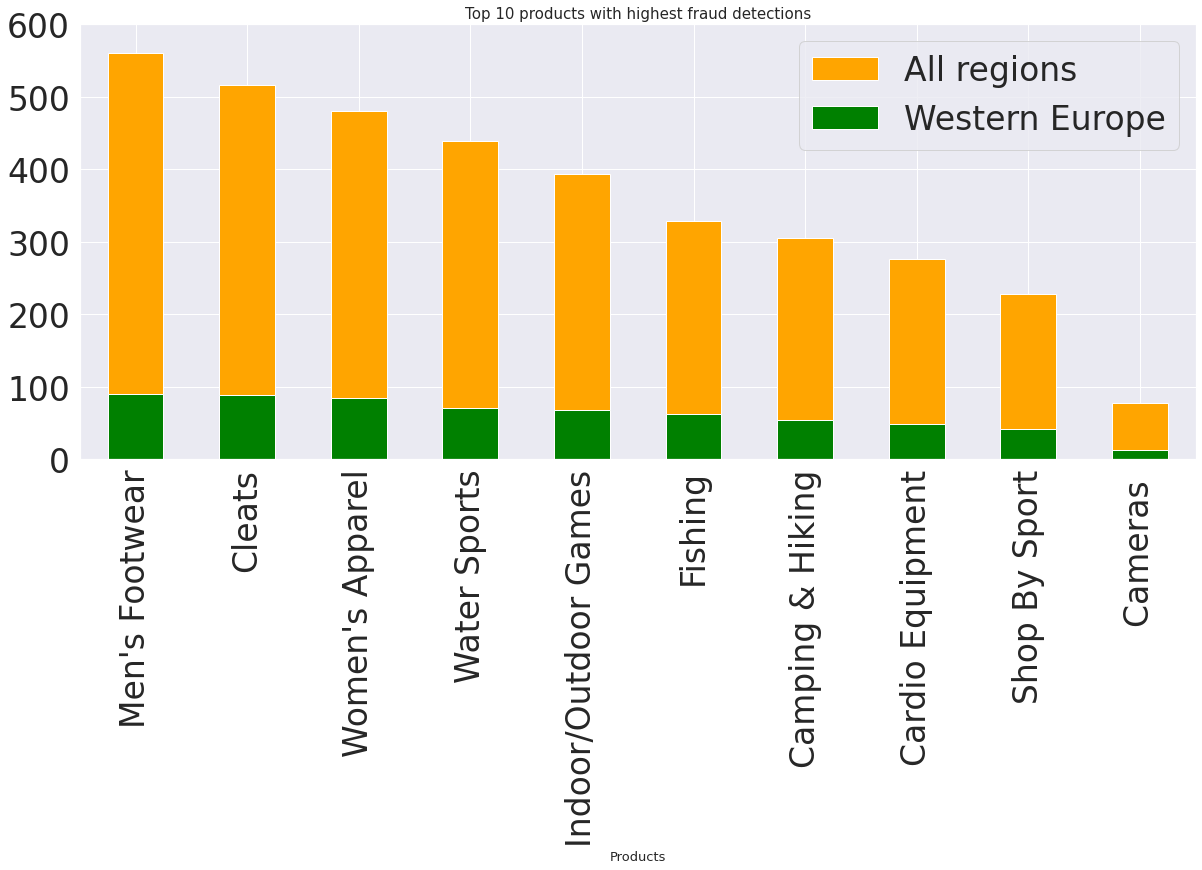

In [ ]:
high_fraud1 = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] 
high_fraud2 = data[(data['Order Status'] == 'SUSPECTED_FRAUD') &(data['Order Region'] == 'Western Europe')]
fraud1=high_fraud1['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud Category",color='orange')
fraud2=high_fraud2['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud product in Western Europe",color='green')
plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.ylim(0,600)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

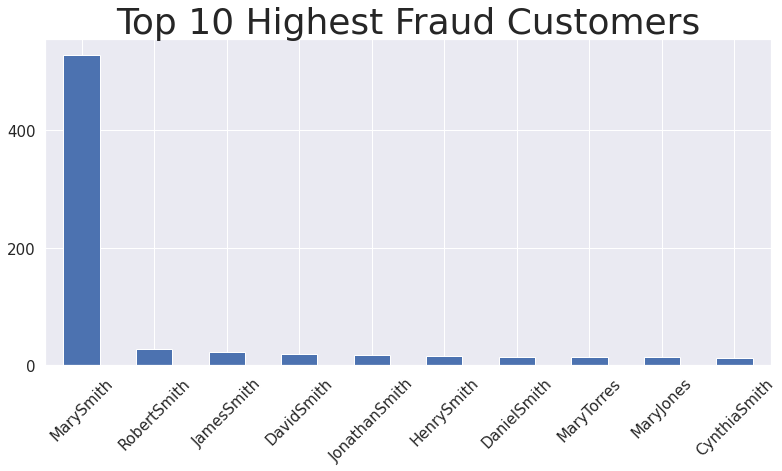

In [ ]:
cus = df[(df['Order Status'] == 'SUSPECTED_FRAUD')] 
cus['Customer Full Name'].value_counts().nlargest(10).plot.bar(fontsize=15,figsize=(13,6), title="Top 10 Highest Fraud Customers")
plt.xticks(rotation=45)

In [ ]:

amount = df[(df['Customer Full Name'] == 'MarySmith')&(df['Order Status'] == 'SUSPECTED_FRAUD')]

print('Tatal Fraud Sales : ', amount['Product Price'].sum())

Tatal Fraud Sales :  66176.88155717199


(array([0]), <a list of 1 Text major ticklabel objects>)

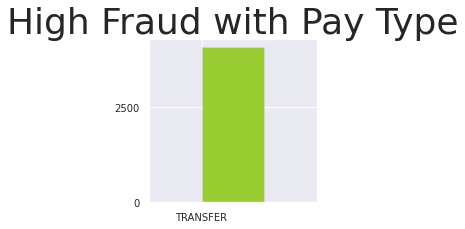

In [ ]:
h_f = df[(df['Order Status'] == 'SUSPECTED_FRAUD')]
h_f['Type'].value_counts().plot.bar(color='yellowgreen',figsize=(3,3),fontsize=10,align='edge', edgecolor='lightgray',
        linewidth=1,width=0.3, title="High Fraud with Pay Type")
plt.xticks(rotation=0)

In [ ]:
#클리츠와 남성신발이 가장 많은 적자가 있어도 대부분의 판매손실은 중앙아메리카와 서유럽지역에서 일어난다
#그렇다면 어떤 지불방법이 판매손실에 연관이 있을까? 지연배송도 연관이 있을까?

In [ ]:
df['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

In [ ]:
#주문상태 중 사기(부정행위)인 주문내역에 사용된 지불방법 : transfer 만 존재
order = df[df['Order Status'] == 'SUSPECTED_FRAUD']
order['Type'].value_counts()

TRANSFER    4062
Name: Type, dtype: int64

In [ ]:
#해외구매사이트다 보니 송금으로 사기가 행해짐
#어떤 지역들에서 어떤 물건들이 제일 손실이 심한가?
fraud = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')]
fraud_1 = fraud['Order Region'].value_counts(normalize=True)
fraud_2 = fraud['Category Name'].value_counts()
#d = pd.Series(fraud_1)
#fraud_order = pd.concat([fraud_1,fraud_2],axis=1)
fraud_1

Western Europe     0.173560
Central America    0.155342
South America      0.088872
West of USA        0.058099
Oceania            0.056376
Southern Europe    0.054899
Caribbean          0.046775
Southeast Asia     0.046036
Northern Europe    0.041851
Eastern Asia       0.038405
East of USA        0.036928
West Asia          0.036189
South Asia         0.035451
US Center          0.029788
North Africa       0.018464
Eastern Europe     0.018218
West Africa        0.017479
South of  USA      0.016248
Southern Africa    0.007878
East Africa        0.007632
Canada             0.007139
Central Africa     0.006893
Central Asia       0.001477
Name: Order Region, dtype: float64

In [ ]:
#분류
#사기 주문, 지연배송 예측
#회귀
#판매,주문량 예측

In [ ]:
train_df=df.copy()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Delivery Status                180519 non-null  object        
 5   Late_delivery_risk             180519 non-null  int64         
 6   Category Name                  180519 non-null  object        
 7   Customer Country               180519 non-null  object        
 8   Customer Id                    180519 non-null  int64         
 9   Customer State                 180519 non-null  object        
 10  Market                         180519 non-null  object        
 11  

In [ ]:
train_df['fraud'] = np.where(train_df['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_df['late_delivery']=np.where(train_df['Delivery Status'] == 'Late delivery', 1, 0)

In [ ]:
#타겟과 연관성이 높은 중복 column삭제
train_df.drop(['Delivery Status','Late_delivery_risk','Order Status','order date (DateOrders)'], axis=1, inplace=True)

In [ ]:
train_df.drop(['order_month_year'],axis=1, inplace=True)

In [ ]:
#데이터 변수 유형 확인
train_df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Category Name                     object
Customer Country                  object
Customer Id                        int64
Customer State                    object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Order Item Total                 float64
Order Region                      object
Product Card Id                    int64
Product Category Id                int64
Product Name                      object
Product Price                    float64
Shipping Mode   

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

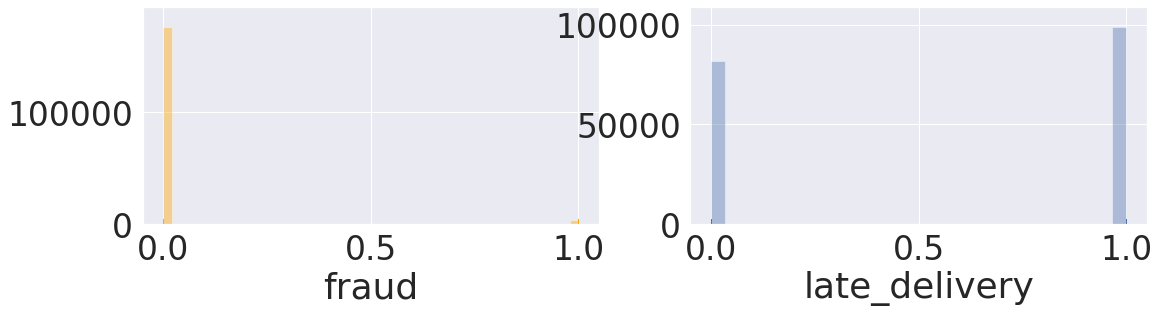

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(train_df["fraud"], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(train_df["late_delivery"], ax = ax[1], kde = False, rug = True)
plt.show()

In [ ]:
#범주형 변수 label encoding 진행 => 회귀는 힘들듯, 분류만
def Change_dftype(data):
    for column in data.columns:
        if data[column].dtype == type(object):
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
    return data

train_df = Change_dftype(train_df)
train_df.dtypes

Type                               int64
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Category Name                      int64
Customer Country                   int64
Customer Id                        int64
Customer State                     int64
Market                             int64
Order City                         int64
Order Country                      int64
Order Customer Id                  int64
Order Id                           int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Order Item Total                 float64
Order Region                       int64
Product Card Id                    int64
Product Category Id                int64
Product Name                       int64
Product Price                    float64
Shipping Mode   

In [ ]:
train_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Name,Customer Country,Customer Id,Customer State,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Region,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,fraud,late_delivery
0,1,3,4,91.250000,40,1,20755,36,3,331,70,20755,77202,13.110000,0.04,180517,0.29,1,314.640015,15,1360,73,78,327.75,3,1875,2018,1,2,22,0,0
1,3,5,4,-249.089996,40,1,19492,36,3,391,69,19492,75939,16.389999,0.05,179254,-0.80,1,311.359985,13,1360,73,78,327.75,3,5374,2018,1,5,12,0,1
2,0,4,4,-247.779999,40,0,19491,5,3,391,69,19491,75938,18.030001,0.06,179253,-0.80,1,309.720001,13,1360,73,78,327.75,3,4426,2018,1,5,12,0,0
3,1,3,4,22.860001,40,0,19490,5,3,3226,8,19490,75937,22.940001,0.07,179252,0.08,1,304.809998,11,1360,73,78,327.75,3,12923,2018,1,5,11,0,0
4,2,2,4,134.210007,40,1,19489,36,3,3226,8,19489,75936,29.500000,0.09,179251,0.45,1,298.250000,11,1360,73,78,327.75,3,10633,2018,1,5,11,0,0


In [ ]:
xf=train_df.loc[:, train_df.columns != 'fraud']
yf=train_df['fraud']
xf_train, xf_test,yf_train,yf_test = train_test_split(xf,yf,test_size = 0.2,random_state = 42)
xl=train_df.loc[:, train_df.columns != 'late_delivery']
yl=train_df['late_delivery']
xl_train, xl_test,yl_train,yl_test = train_test_split(xl,yl,test_size = 0.2, random_state = 42)

In [ ]:
# 변수들의 범위가 매우 다르기 때문에 표준화 처리
sc = StandardScaler()
xf_train=sc.fit_transform(xf_train)
xf_test=sc.transform(xf_test)
xl_train=sc.fit_transform(xl_train)
xl_test=sc.transform(xl_test)

In [ ]:
pip install eli5

In [ ]:
#target 최빈값 기준으로 예측하기
print(yf_train.value_counts(normalize=True))
print(yl_train.value_counts(normalize=True))

0    0.977759
1    0.022241
Name: fraud, dtype: float64
1    0.548281
0    0.451719
Name: late_delivery, dtype: float64


In [ ]:
yf_train_pred = [0] * len(yf_train)
print('주문사기 예측 기준모델 accuracy:', accuracy_score(yf_train, yf_train_pred)*100,'%')
print('주문사기 예측 기준모델 f1:',f1_score(yf_train, yf_train_pred)*100,'%')
print('주문사기 예측 기준모델 auc:', roc_auc_score(yf_train, yf_train_pred)*100,'%')

yl_train_pred = [1] * len(yl_train)
print('지연배송 예측 기준모델 accuracy:', accuracy_score(yl_train, yl_train_pred)*100,'%')
print('지연배송 예측 기준모델 f1:',f1_score(yl_train, yl_train_pred)*100,'%')
print('지연배송 예측 기준모델 auc:', roc_auc_score(yl_train, yl_train_pred)*100,'%')

주문사기 예측 기준모델 accuracy: 97.77585430876294 %
주문사기 예측 기준모델 f1: 0.0 %
주문사기 예측 기준모델 auc: 50.0 %
지연배송 예측 기준모델 accuracy: 54.82809957414396 %
지연배송 예측 기준모델 f1: 70.82448176390349 %
지연배송 예측 기준모델 auc: 50.0 %


In [ ]:
def classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test):
    
    model_f=model_f.fit(xf_train,yf_train) 
    model_l=model_l.fit(xl_train,yl_train) 

    yf_pred=model_f.predict(xf_test)
    yl_pred=model_l.predict(xl_test)  

    accuracy_f=accuracy_score(yf_pred, yf_test) 
    accuracy_l=accuracy_score(yl_pred, yl_test) 

    recall_f=recall_score(yf_pred, yf_test) 
    recall_l=recall_score(yl_pred, yl_test)

    conf_f=confusion_matrix(yf_test, yf_pred)
    conf_l=confusion_matrix(yl_test, yl_pred)

    f1_f=f1_score(yf_test, yf_pred)
    f1_l=f1_score(yl_test, yl_pred)

    print('주문사기 예측모델 Accuracy :', (accuracy_f)*100,'%')
    print('주문사기 예측모델 Recall score :', (recall_f)*100,'%')
    print('주문사기 예측모델 Conf Matrix :\n',  (conf_f))
    print('주문사기 예측모델 F1 score :', (f1_f)*100,'%')
    print('지연배송 예측모델 Accuracy :', (accuracy_l)*100,'%')
    print('지연배송 예측모델 Recall score :', (recall_l)*100,'%')
    print('지연배송 예측모델 Conf Matrix :\n',  (conf_l))
    print('지연배송 예측모델 F1 score :', (f1_l)*100,'%')

In [ ]:
#Logistic classification model
model_f = LogisticRegression(solver='lbfgs',random_state=0) 
model_l = LogisticRegression(solver='lbfgs',random_state=0) 
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


주문사기 예측모델 Accuracy : 97.80356747174828 %
주문사기 예측모델 Recall score : 59.4059405940594 %
주문사기 예측모델 Conf Matrix :
 [[35131   123]
 [  670   180]]
주문사기 예측모델 F1 score : 31.222896790980055 %
지연배송 예측모델 Accuracy : 98.84777309993352 %
지연배송 예측모델 Recall score : 97.9419185672587 %
지연배송 예측모델 Conf Matrix :
 [[15891   416]
 [    0 19797]]
지연배송 예측모델 F1 score : 98.96025993501625 %


In [ ]:
#Random forest
model_f = RandomForestClassifier()
model_l = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

주문사기 예측모델 Accuracy : 98.85885220474185 %
주문사기 예측모델 Recall score : 98.23788546255507 %
주문사기 예측모델 Conf Matrix :
 [[35246     8]
 [  404   446]]
주문사기 예측모델 F1 score : 68.4049079754601 %
지연배송 예측모델 Accuracy : 98.84777309993352 %
지연배송 예측모델 Recall score : 97.9419185672587 %
지연배송 예측모델 Conf Matrix :
 [[15891   416]
 [    0 19797]]
지연배송 예측모델 F1 score : 98.96025993501625 %


In [ ]:
model_f = XGBClassifier()
model_l = XGBClassifier()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

주문사기 예측모델 Accuracy : 97.80633724795037 %
주문사기 예측모델 Recall score : 64.64646464646465 %
주문사기 예측모델 Conf Matrix :
 [[35184    70]
 [  722   128]]
주문사기 예측모델 F1 score : 24.427480916030536 %
지연배송 예측모델 Accuracy : 98.84777309993352 %
지연배송 예측모델 Recall score : 97.9419185672587 %
지연배송 예측모델 Conf Matrix :
 [[15891   416]
 [    0 19797]]
지연배송 예측모델 F1 score : 98.96025993501625 %


In [ ]:
model_f = tree.DecisionTreeClassifier()
model_l = tree.DecisionTreeClassifier()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

주문사기 예측모델 Accuracy : 99.02780855306891 %
주문사기 예측모델 Recall score : 79.24970691676437 %
주문사기 예측모델 Conf Matrix :
 [[35077   177]
 [  174   676]]
주문사기 예측모델 F1 score : 79.38931297709922 %
지연배송 예측모델 Accuracy : 99.32417460669178 %
지연배송 예측모델 Recall score : 99.35382906759554 %
지연배송 예측모델 Conf Matrix :
 [[16179   128]
 [  116 19681]]
지연배송 예측모델 F1 score : 99.38393172751603 %


In [ ]:
classification_f = {'주문사기 예측모델':['Logistic','Random Forest','XGBoost','Decision tree'],
        'Accuracy Score':[97.80,98.79,97.77,98.85],
        'Recall Score':  [59.29,94.24,62.17,75.02],
        'F1 Score':       [31.84,67.02,23.01,75.85]}

classification_l = {'지연배송 분류모델':['Logistic','Random Forest','XGBoost','Decision tree'],
        'Accuracy Score':[98.84,98.98,98.84,99.08],
        'Recall Score':  [97.94,98.17,97.94,99.23],
        'F1 Score':      [98.96,99.07,98.96,99.16] }

In [ ]:
classification_ftable= pd.DataFrame (classification_f)
classification_ltable= pd.DataFrame (classification_l)

In [ ]:
classification_ftable

,주문사기 예측모델,Accuracy Score,Recall Score,F1 Score
0,Logistic,97.80,59.29,31.84
1,Random Forest,98.79,94.24,67.02
2,XGBoost,97.77,62.17,23.01
3,Decision tree,98.85,75.02,75.85


In [ ]:
classification_ltable

,지연배송 분류모델,Accuracy Score,Recall Score,F1 Score
0,Logistic,98.84,97.94,98.96
1,Random Forest,98.98,98.17,99.07
2,XGBoost,98.84,97.94,98.96
3,Decision tree,99.08,99.23,99.16


In [ ]:
def cross_validation_model(model_f,model_l,xf,yf,xl,yl):
    model_f= model_f.fit(xf,yf)
    model_l = model_l.fit(xl,yl)
    scores_f = cross_val_score(model_f, xf, yf, cv=6)
    scores_l = cross_val_score(model_l, xl, yl, cv=6)
    print('Model used is',model_f)
    print('Cross validation accuracy of fraud: %0.2f (+/- %0.2f)' % (scores_f.mean(), scores_f.std() * 2))
    print('Cross validation accuracy of late : %0.2f (+/- %0.2f)' % (scores_l.mean(), scores_l.std() * 2))

In [ ]:
cross_validation_model(model_f,model_l,xf,yf,xl,yl)

Model used is DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Cross validation accuracy of fraud: 0.97 (+/- 0.03)
Cross validation accuracy of late : 0.99 (+/- 0.01)


Text(0.5, 1.0, 'Importance for Fraud')

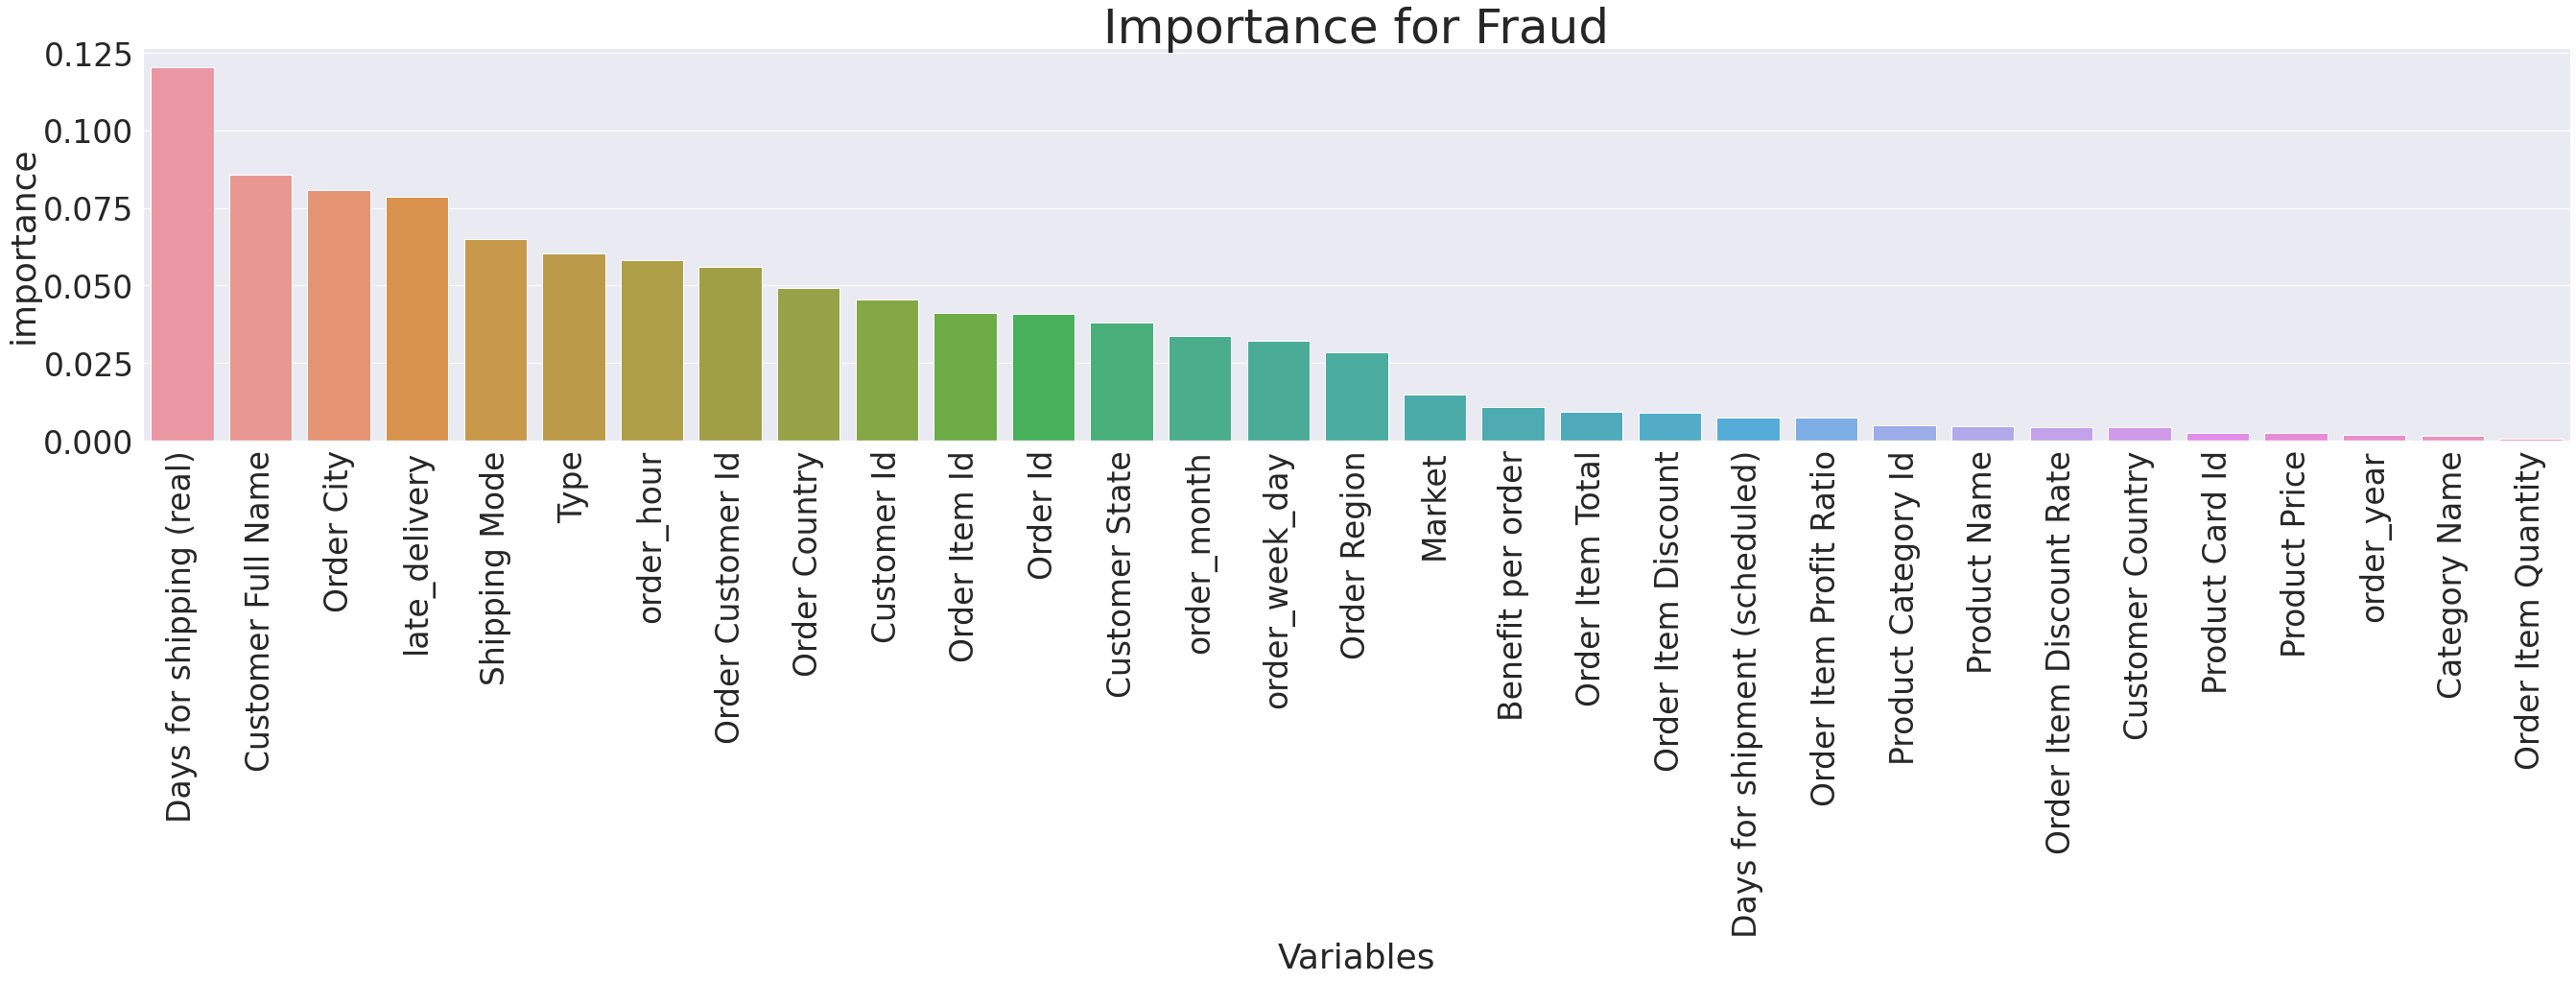

In [ ]:
#사기탐지랑 배송일은 전혀 관련이 없는데 중요도가 높게 나옴
important_col=model_f.feature_importances_.argsort()
feat_imp=pd.DataFrame({'Variables':xf.columns[important_col],'importance':model_f.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='Variables', y = 'importance', data=feat_imp, height=8, aspect=5, kind="bar")
plt.xticks(rotation=90)

plt.title("Importance for Fraud",fontsize=50)

Text(0.5, 1.0, 'Importance for Late Delivery')

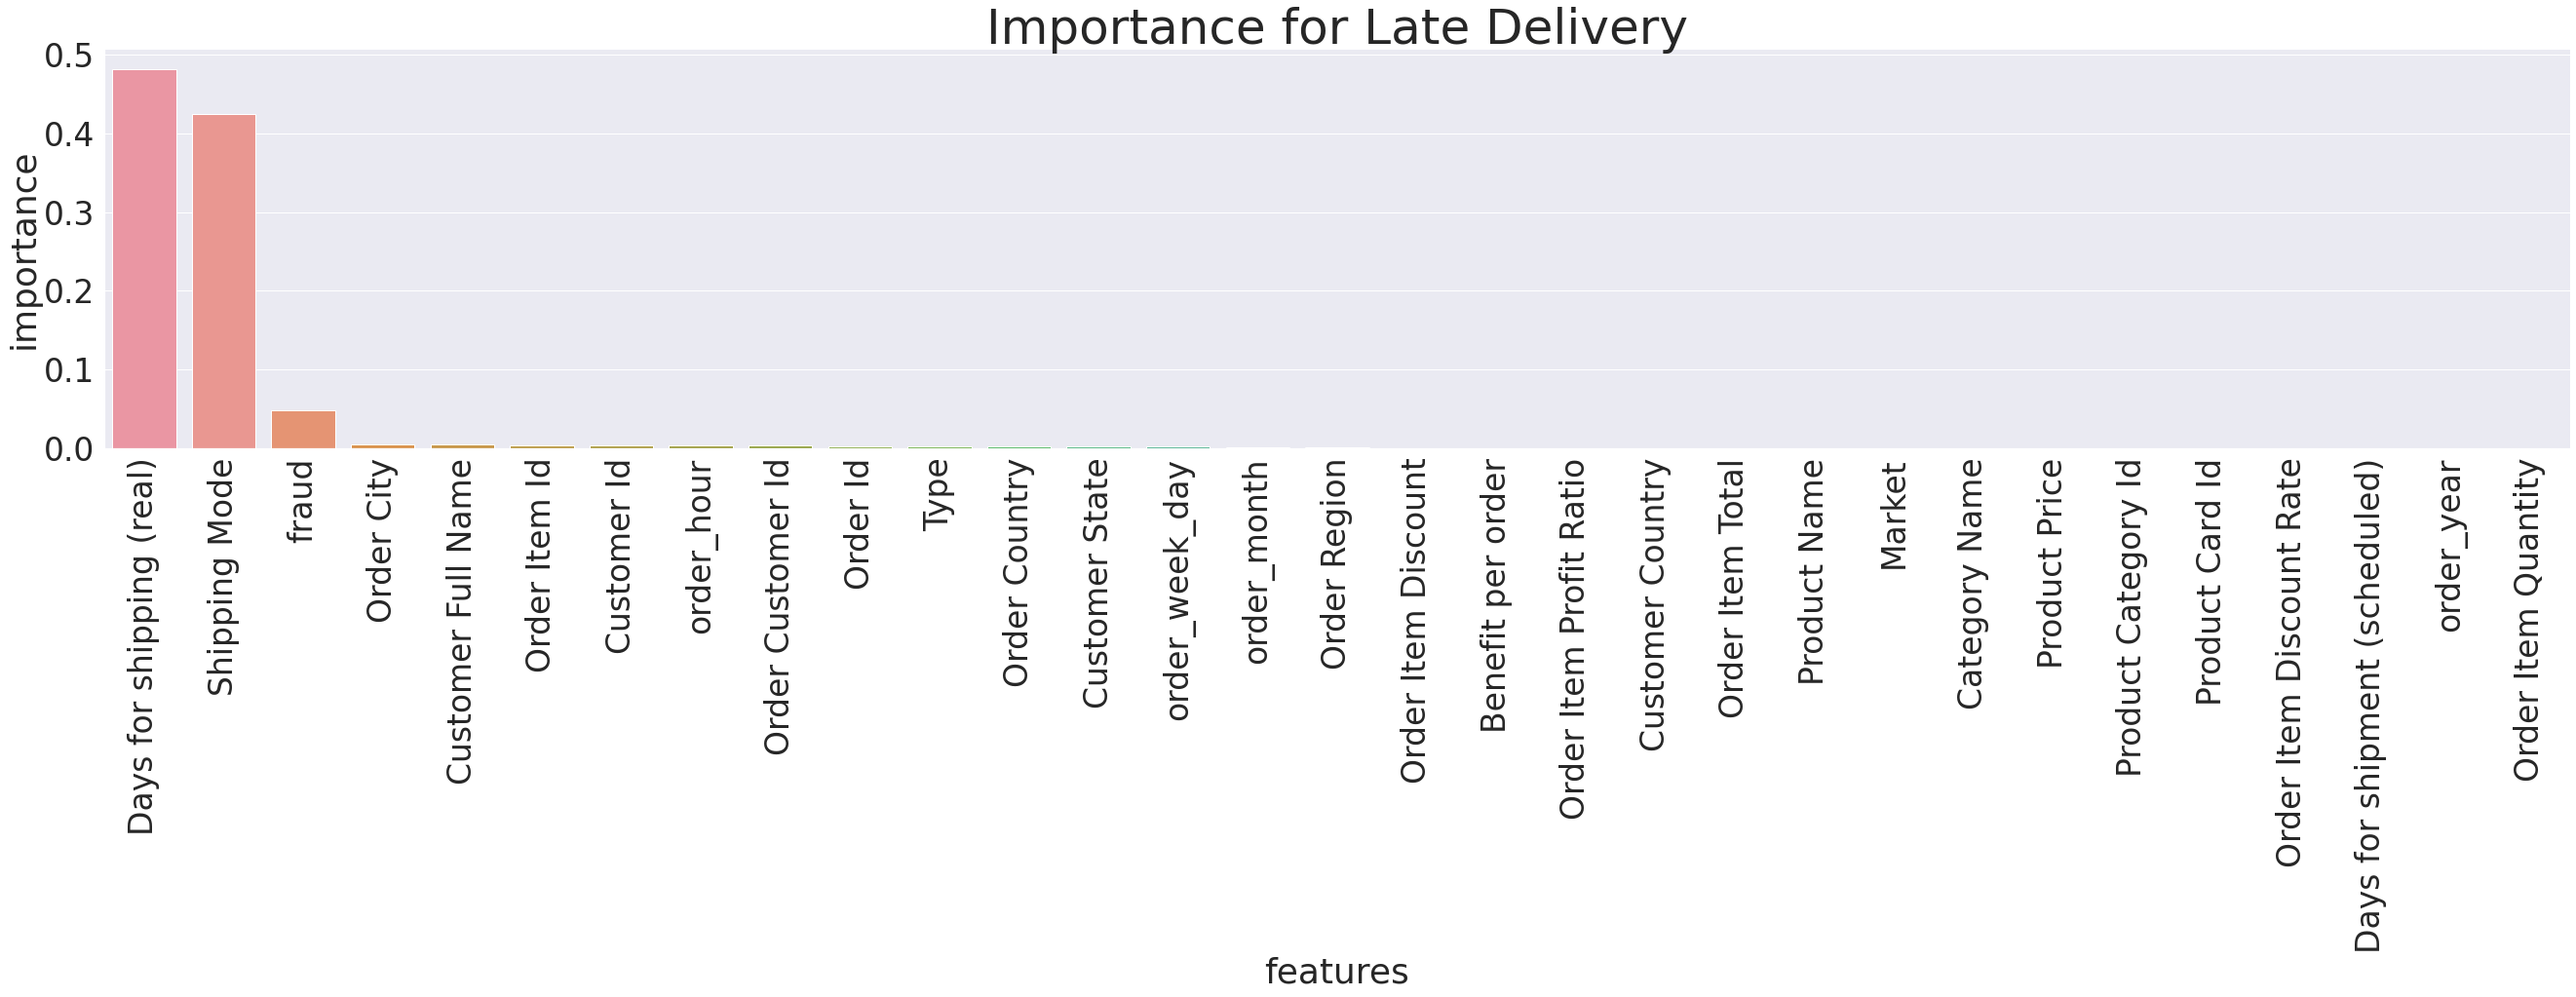

In [ ]:
#배송날짜(실제,예측) 특성은 90%이상의 중요도가 나타남
#제거해서 다시 모델학습
important_col=model_l.feature_importances_.argsort()
feat_imp=pd.DataFrame({'features':xl.columns[important_col],'importance':model_l.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='features', y = 'importance', data=feat_imp, height=8, aspect=5,  kind="bar")
plt.xticks(rotation=90)
plt.title("Importance for Late Delivery",fontsize=50)

In [ ]:
new_data=train_df.copy()

In [ ]:
new_data=new_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)

In [ ]:
new_xl=new_data.loc[:, new_data.columns != 'late_delivery']
new_yl=train_df['late_delivery']

new_xl_train, new_xl_test,new_yl_train,new_yl_test = train_test_split(new_xl,new_yl,test_size = 0.2,random_state = 42)

In [ ]:
new_xl_train=sc.fit_transform(new_xl_train)
new_xl_test=sc.transform(new_xl_test)

In [ ]:
def New_classifiermodel(model_c,xc_train, xc_test,yc_train,yc_test):
    model_c=model_c.fit(xc_train,yc_train)
    yc_pred=model_c.predict(xc_test) 
    accuracy_c=accuracy_score(yc_pred, yc_test)
    recall_c=recall_score(yc_pred, yc_test,average='weighted')
    conf_c=confusion_matrix(yc_test, yc_pred)
    f1_c=f1_score(yc_test, yc_pred,average='weighted')
    print('Model paramters used are :',model_c)
    print('Accuracy         :', (accuracy_c)*100,'%')
    print('Recall score        :', (recall_c)*100,'%')
    #print('Conf Matrix        : \n',(conf_c))
    print('F1 score       :', (f1_c)*100,'%')

In [ ]:
new_model_l=tree.DecisionTreeClassifier()
New_classifiermodel(new_model_l,new_xl_train, new_xl_test,new_yl_train,new_yl_test)

Model paramters used are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy         : 88.69931309550189 %
Recall score        : 88.69931309550189 %
F1 score       : 88.69801459960387 %


Text(0.5, 1.0, 'Importance for Late Delivery')

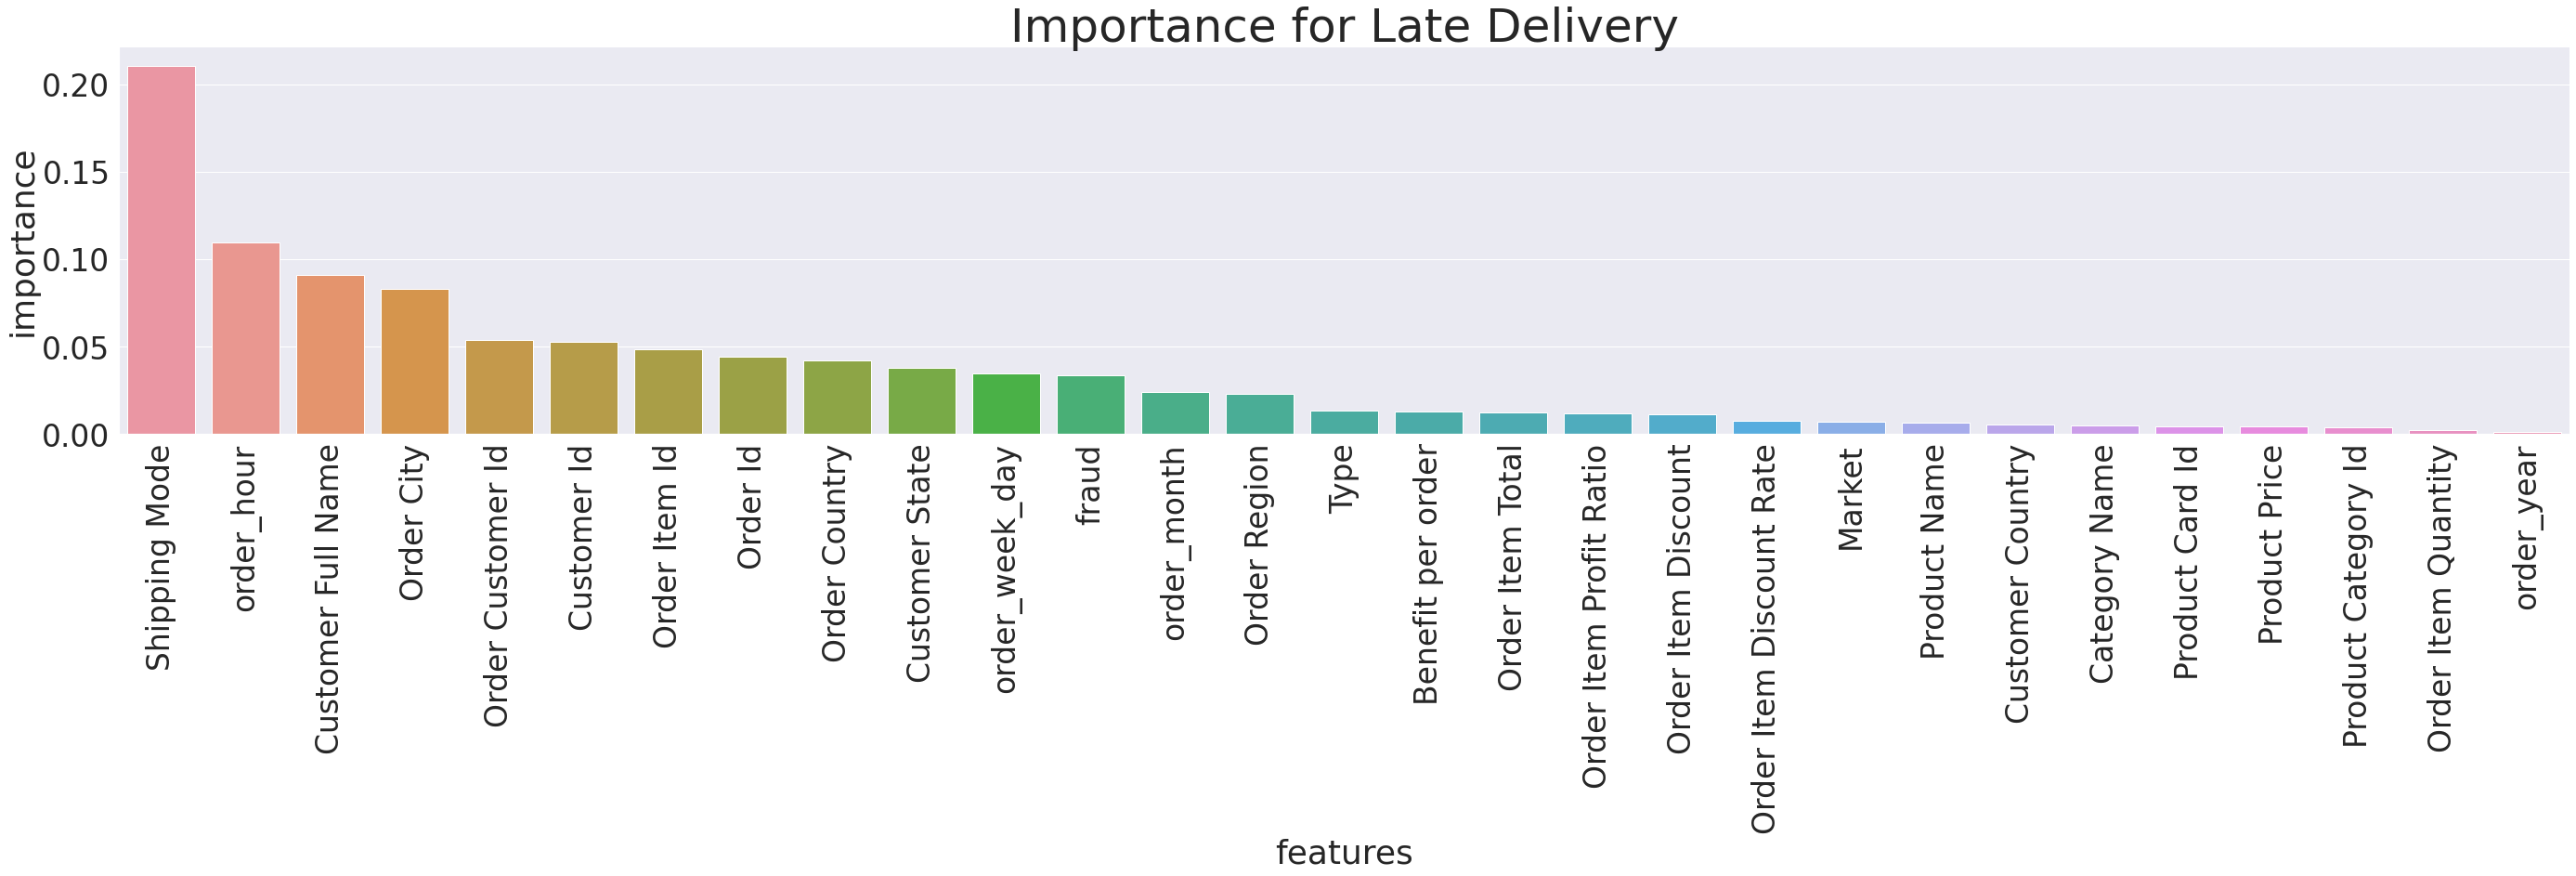

In [ ]:
important_col=new_model_l.feature_importances_.argsort()
feat_imp=pd.DataFrame({'features':new_xl.columns[important_col],'importance':new_model_l.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='features', y = 'importance', data=feat_imp, height=8, aspect=5,  kind="bar")
plt.xticks(rotation=90)
plt.title("Importance for Late Delivery",fontsize=50)
#배송방법이 높은 중요도를 나타냄. 회사는 지연배송을 막기위해 배송방법을 조정하면 좋음